In [2]:
#Dependencies
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from datetime import date
import math
from pandas.api.types import CategoricalDtype
import holidays

#Drive Mount
drive.mount('/content/drive')
directory = '/content/drive/MyDrive/Data Projects/Parking Citations/Files'

#Dataframe Settings
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.options.mode.chained_assignment = None

Mounted at /content/drive


#Data
______________________


In [3]:
#Importing Cleaned Data
df = pd.read_csv(f'{directory}/Parking_Citations_Cleaned.csv')

#DataFrame of individual dates since 2015-1-1 to 3-31
All_Days = pd.DataFrame(pd.date_range(start="2015-01-01",end="2022-03-31").to_pydatetime().tolist(), columns = ['Dates'])

# Exploratory Analysis
_______________________

## Parking Citation Fines and Revenue

In [4]:
#Calculate daily average revenue from parking citations
Daily_Revenue = pd.DataFrame(df['Fine_Amount'].groupby(df['Date']).sum())
Daily_Revenue = Daily_Revenue.reset_index()
Daily_Revenue = Daily_Revenue.rename(columns={'Fine_Amount':'Daily_Revenue'})
Daily_Revenue['Date'] = pd.to_datetime(Daily_Revenue.Date) 
Daily_Revenue.to_csv(f'{directory}/Daily_Revenue.csv', index=False)

#Calculate average daily citations
Average_Daily = pd.crosstab(index=df['Date'], columns='count')

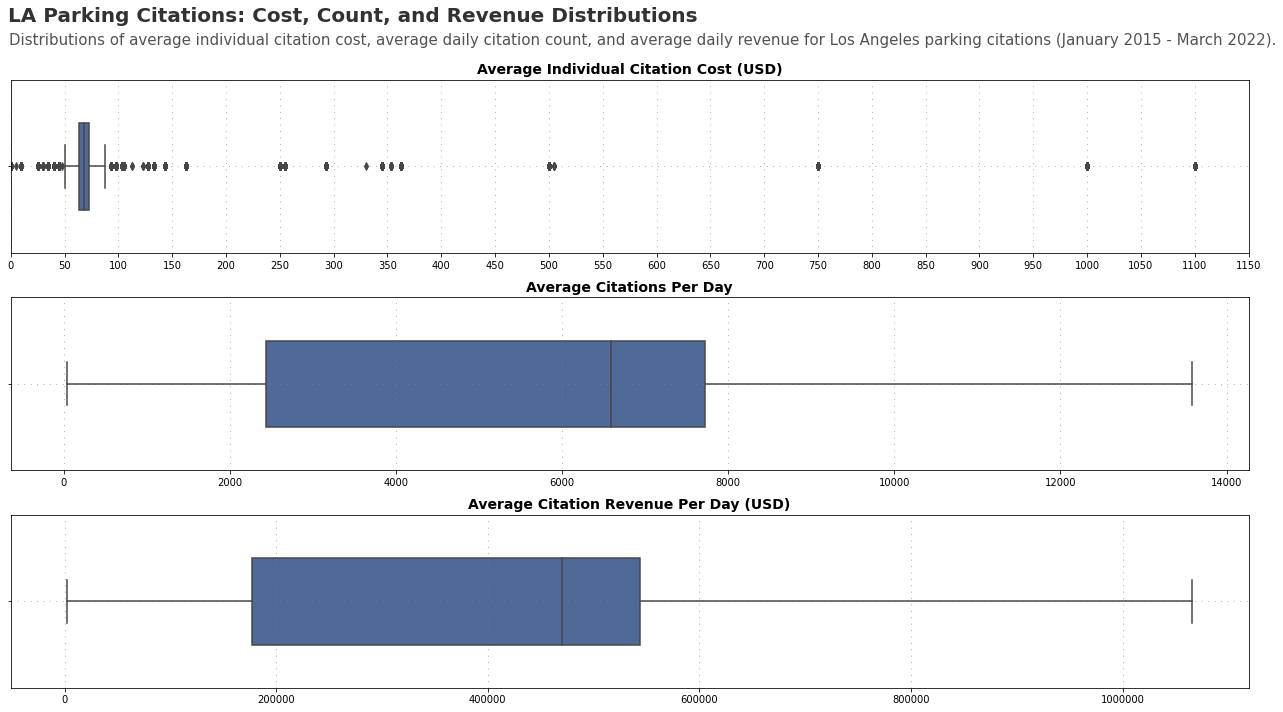

In [5]:
#Figure initialization
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(3, 1)

#Figure annotations
plt.figtext(0.003, 1.059, 'LA Parking Citations: Cost, Count, and Revenue Distributions', fontfamily='sans-serif',fontsize=20, fontweight='bold',color='#323232')
plt.figtext(0.004, 1.024, 'Distributions of average individual citation cost, average daily citation count, and average daily revenue for Los Angeles parking citations (January 2015 - March 2022).', fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Individual Citation Cost (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(x='Fine_Amount', data=df, orient='h', color='#4367a5', width=0.5, showfliers = True)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax1.set_ylabel('', size = 15, fontname = 'sans-serif')
ax1.set_xlabel('', size = 15, fontname = 'sans-serif')
plt.xticks(np.arange(0, 1151, step=50))
plt.xlim(0,1150)

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citations Per Day', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(x='count', data=Average_Daily, orient='h', color='#4367a5', width=0.5, showfliers = True)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax2.set_ylabel('', size = 15, fontname = 'sans-serif')
ax2.set_xlabel('', size = 15, fontname = 'sans-serif')
ax2.ticklabel_format(style='plain', axis='x')

#Plot 3 specifications
ax3 = ax.add_subplot(gs[2,0])
plt.title('Average Citation Revenue Per Day (USD)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(x='Daily_Revenue', data=Daily_Revenue, orient='h', color='#4367a5', width=0.5, showfliers = True)
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
ax3.set_ylabel('', size = 15, fontname = 'sans-serif')
ax3.set_xlabel('', size = 15, fontname = 'sans-serif')
ax3.ticklabel_format(style='plain', axis='x')

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Cost, Count, and Revenue Distributions.png' , bbox_inches="tight", dpi=600)

##Citation Revenue

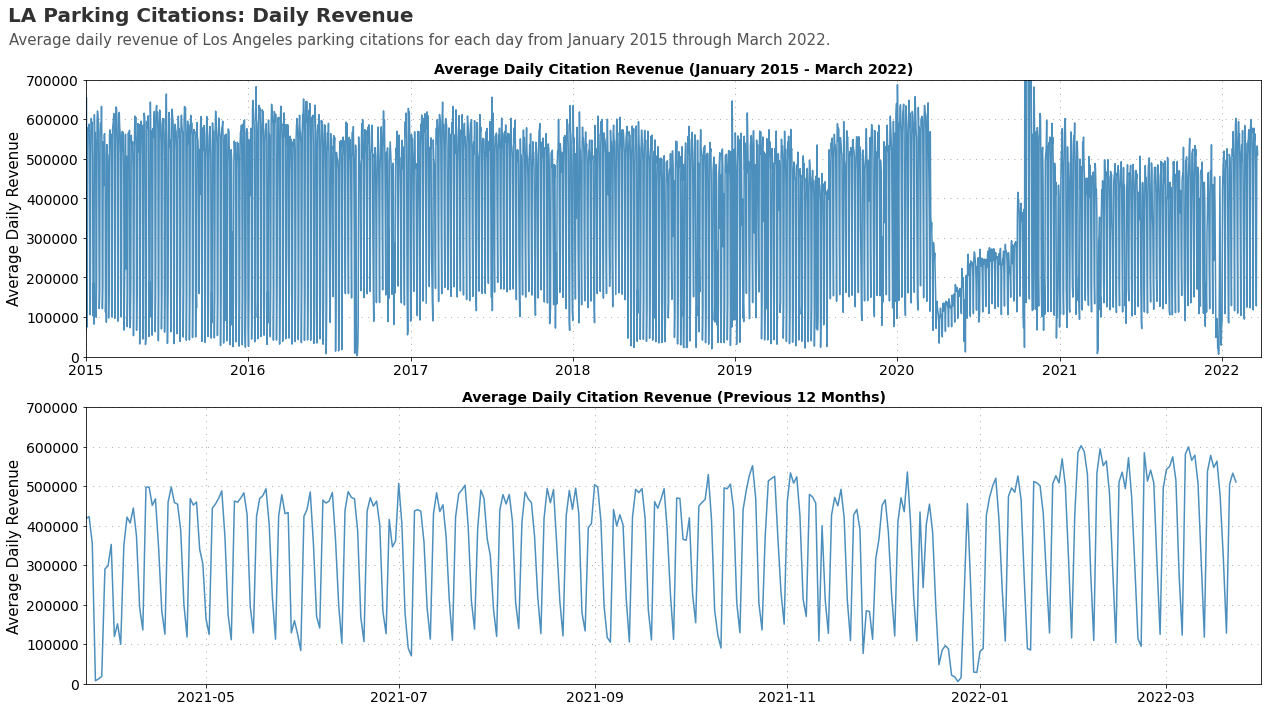

In [32]:
#Plotting Daily Revenue
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Revenue', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily revenue of Los Angeles parking citations for each day from January 2015 through March 2022.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 Specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Revenue (January 2015 - March 2022)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=Daily_Revenue, x='Date', y='Daily_Revenue', ax=ax1, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,700000);
ax1.set_xlim([date(2015, 1, 1), date(2022, 3, 31)])

#Plot 2 Specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue (Previous 12 Months)', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=Daily_Revenue, x='Date', y='Daily_Revenue', ax=ax2, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,700000);
ax2.set_xlim([date(2021, 3, 24), date(2022, 3, 31)])

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Daily Revenue.png' , bbox_inches="tight", dpi=300)

##Citations and Revenue By Year

In [7]:
#Creating Crosstab and Frequency Tables
df_year = pd.crosstab(index=df['Year'], columns='count')
df_year = df_year.reset_index() 
df_year_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Year']).sum())
df_year_sum = df_year_sum.reset_index() 

In [8]:
#Get Counts of Days in each year
All_Days['Year'] = pd.DatetimeIndex(All_Days['Dates']).year
df_year['DayCounts'] = ''
for i in df_year.index:
  y = df_year['Year'][i]
  df_year['DayCounts'][i] = len(All_Days.loc[All_Days['Year'] == y])
df_year['Citations_Per_Day'] = df_year['count']/df_year['DayCounts']
df_year_sum['Revenue_Per_Day'] = df_year_sum['Fine_Amount']/df_year['DayCounts']

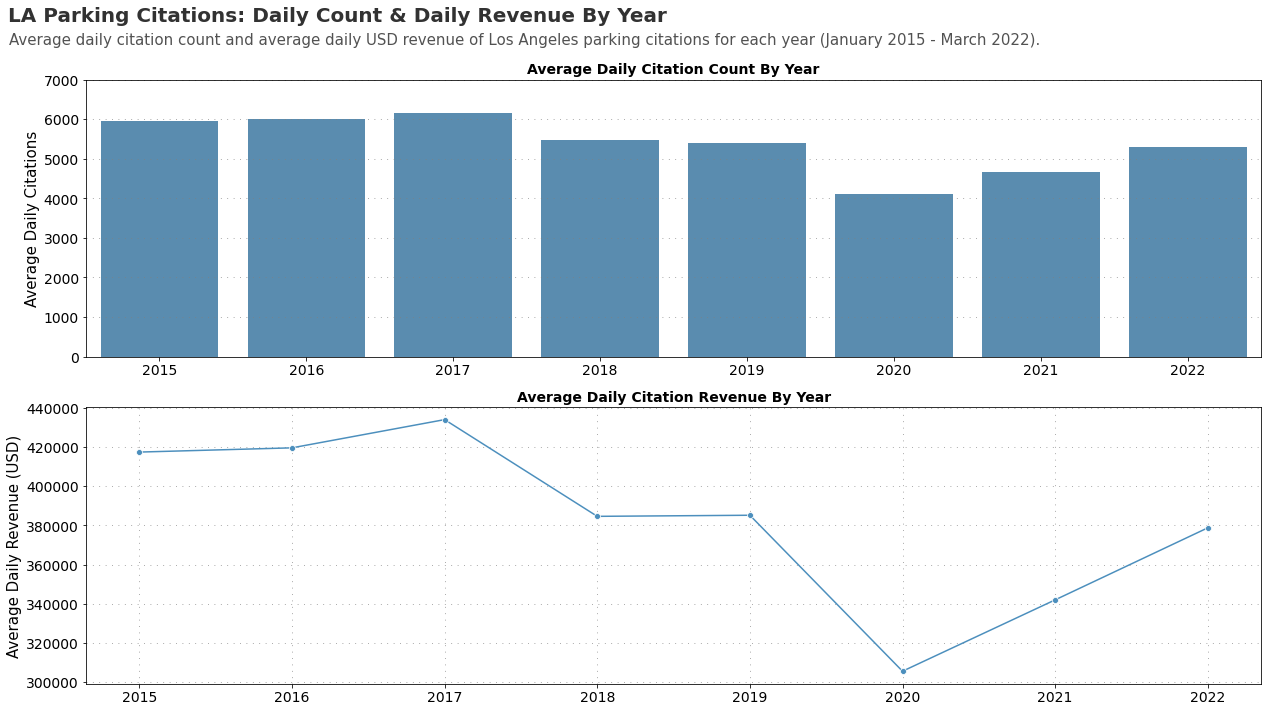

In [9]:
#Plotting Citations and Revenue By Year
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Count & Daily Revenue By Year', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations for each year (January 2015 - March 2022).", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count By Year', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_year, x='Year', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,7000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue By Year', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_year_sum, x='Year', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Yearly Daily Revenue.png' , bbox_inches="tight", dpi=300)

##Citations and Revenue By Month

In [10]:
#Creating Crosstab and Frequency Tables
df_month = pd.crosstab(index=df['Month'], columns='count')
df_month = df_month.reset_index() 
df_month_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Month']).sum())
df_month_sum = df_month_sum.reset_index() 

#Sorting By Month Order
x = CategoricalDtype(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_month['Month'] = df_month['Month'].astype(x)
df_month_sum['Month'] = df_month_sum['Month'].astype(x)
df_month.sort_values(by="Month", inplace =True)
df_month_sum.sort_values(by="Month", inplace =True)

In [11]:
#Get Counts of Days in each Month
All_Days['Month'] = pd.DatetimeIndex(All_Days['Dates']).month_name()
df_month['DayCounts'] = ''
for i in df_month.index:
  y = df_month['Month'][i]
  df_month['DayCounts'][i] = len(All_Days.loc[All_Days['Month'] == y])
df_month['Citations_Per_Day'] = df_month['count']/df_month['DayCounts']
df_month_sum['Revenue_Per_Day'] = df_month_sum['Fine_Amount']/df_month['DayCounts']

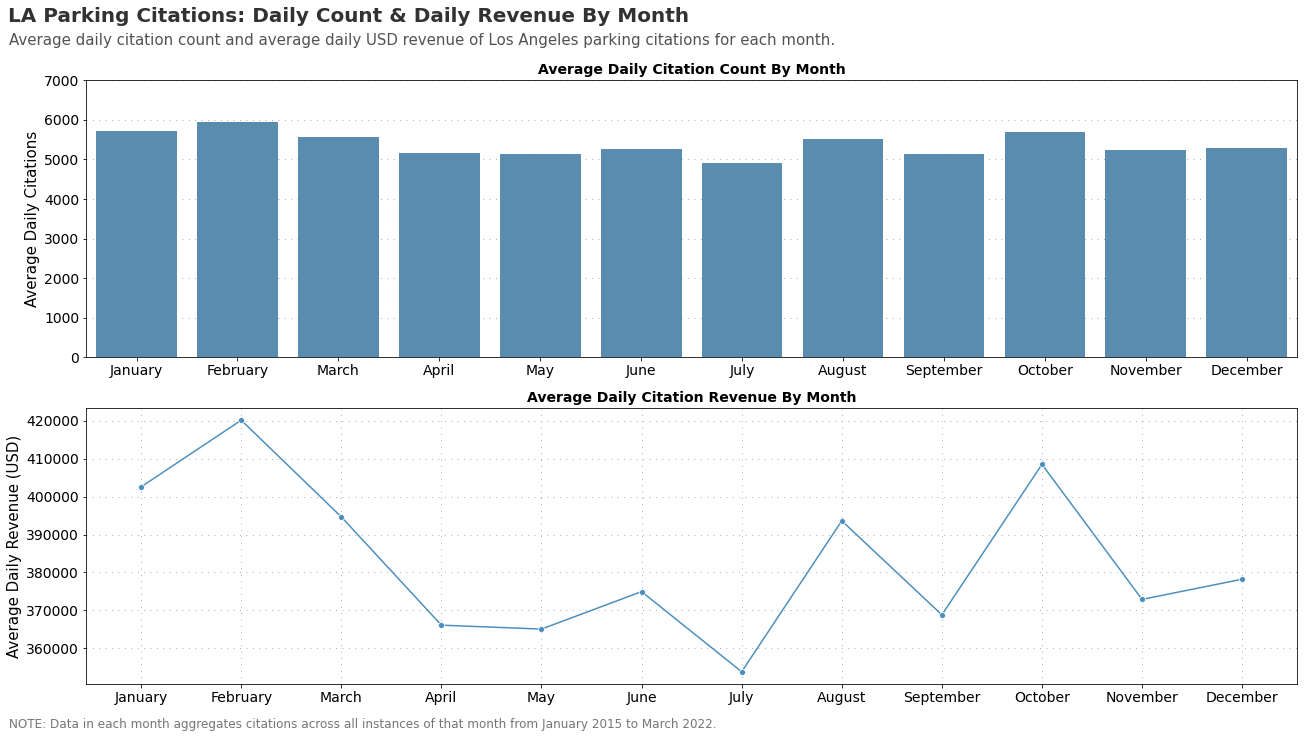

In [12]:
#Plotting Daily Frequency & Revenue By Month
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Count & Daily Revenue By Month', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations for each month.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.03, 'NOTE: Data in each month aggregates citations across all instances of that month from January 2015 through March 2022.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count By Month', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_month, x='Month', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,7000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue By Month', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_month_sum, x='Month', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Monthly Daily Revenue.png' , bbox_inches="tight", dpi=300)

##Citations and Revenue By Day of the Month

In [13]:
#Creating Crosstab and Frequency Tables
df_Day = pd.crosstab(index=df['Day'], columns='count')
df_Day = df_Day.reset_index() 
df_Day_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Day']).sum())
df_Day_sum = df_Day_sum.reset_index() 

In [14]:
#Get Counts of Day Numbers in each Month
All_Days['Day'] = pd.DatetimeIndex(All_Days['Dates']).day 
df_Day['DayCounts'] = ''
for i in df_Day.index:
  y = df_Day['Day'][i]
  df_Day['DayCounts'][i] = len(All_Days.loc[All_Days['Day'] == y])
df_Day['Citations_Per_Day'] = df_Day['count']/df_Day['DayCounts']
df_Day_sum['Revenue_Per_Day'] = df_Day_sum['Fine_Amount']/df_Day['DayCounts']

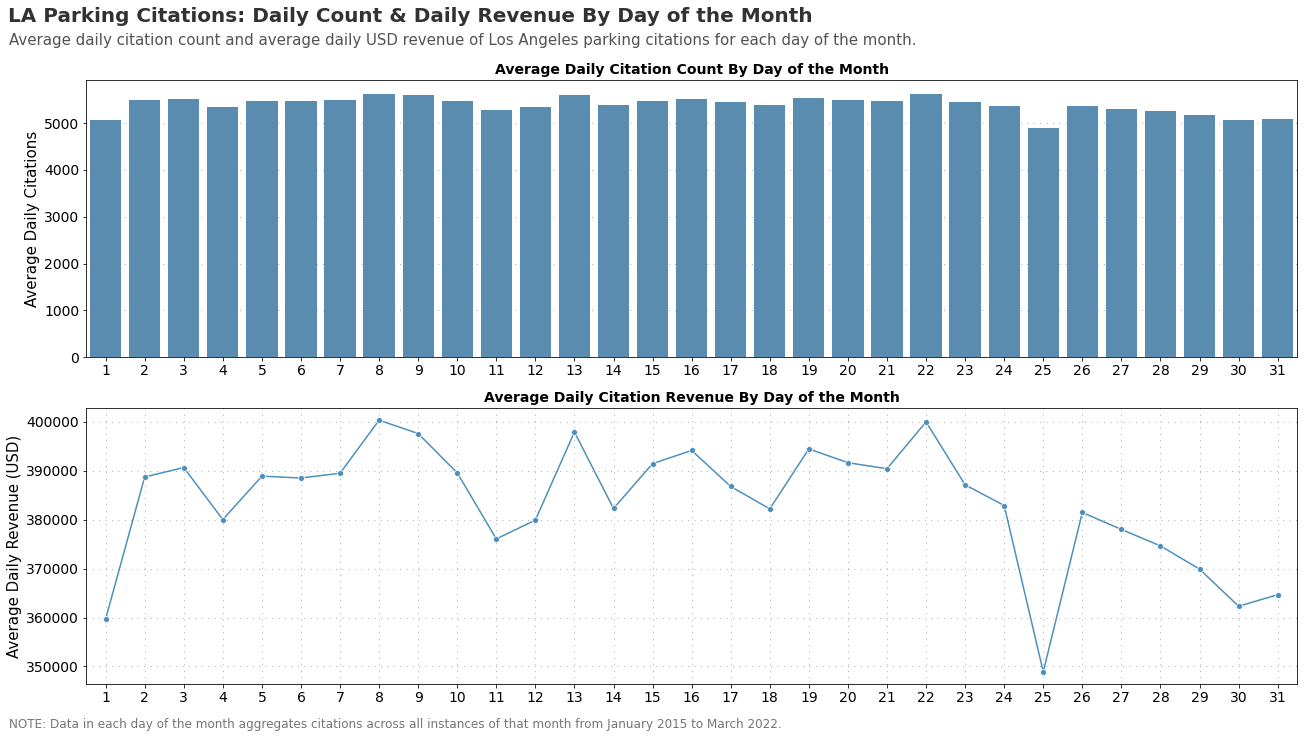

In [15]:
#Plotting unique letters
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Count & Daily Revenue By Day of the Month', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations for each day of the month.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.03, 'NOTE: Data in each day of the month aggregates citations across all instances of that month from January 2015 through March 2022.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count By Day of the Month', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Day, x='Day', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue By Day of the Month', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Day_sum, x='Day', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(1, 32, step=1))
plt.xlim(0.5,31.5);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Day of Month Daily Revenue.png' , bbox_inches="tight", dpi=300)

##Citations and Revenue By Day of the Week



In [16]:
#Creating Crosstab and Frequency Tables
df_Weekday = pd.crosstab(index=df['Weekday'], columns='count')
df_Weekday = df_Weekday.reset_index() 
df_Weekday_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Weekday']).sum())
df_Weekday_sum = df_Weekday_sum.reset_index() 

In [17]:
#Sorting By Month Order
x = CategoricalDtype(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
df_Weekday['Weekday'] = df_Weekday['Weekday'].astype(x)
df_Weekday_sum['Weekday'] = df_Weekday_sum['Weekday'].astype(x)
df_Weekday.sort_values(by="Weekday", inplace =True)
df_Weekday_sum.sort_values(by="Weekday", inplace =True)

In [18]:
#Get Counts of Day Numbers in each Month
All_Days['Weekday'] = All_Days['Dates'].dt.day_name()

df_Weekday['DayCounts'] = ''
for i in df_Weekday.index:
  y = df_Weekday['Weekday'][i]
  df_Weekday['DayCounts'][i] = len(All_Days.loc[All_Days['Weekday'] == y])
df_Weekday['Citations_Per_Day'] = df_Weekday['count']/df_Weekday['DayCounts']
df_Weekday_sum['Revenue_Per_Day'] = df_Weekday_sum['Fine_Amount']/df_Weekday['DayCounts']

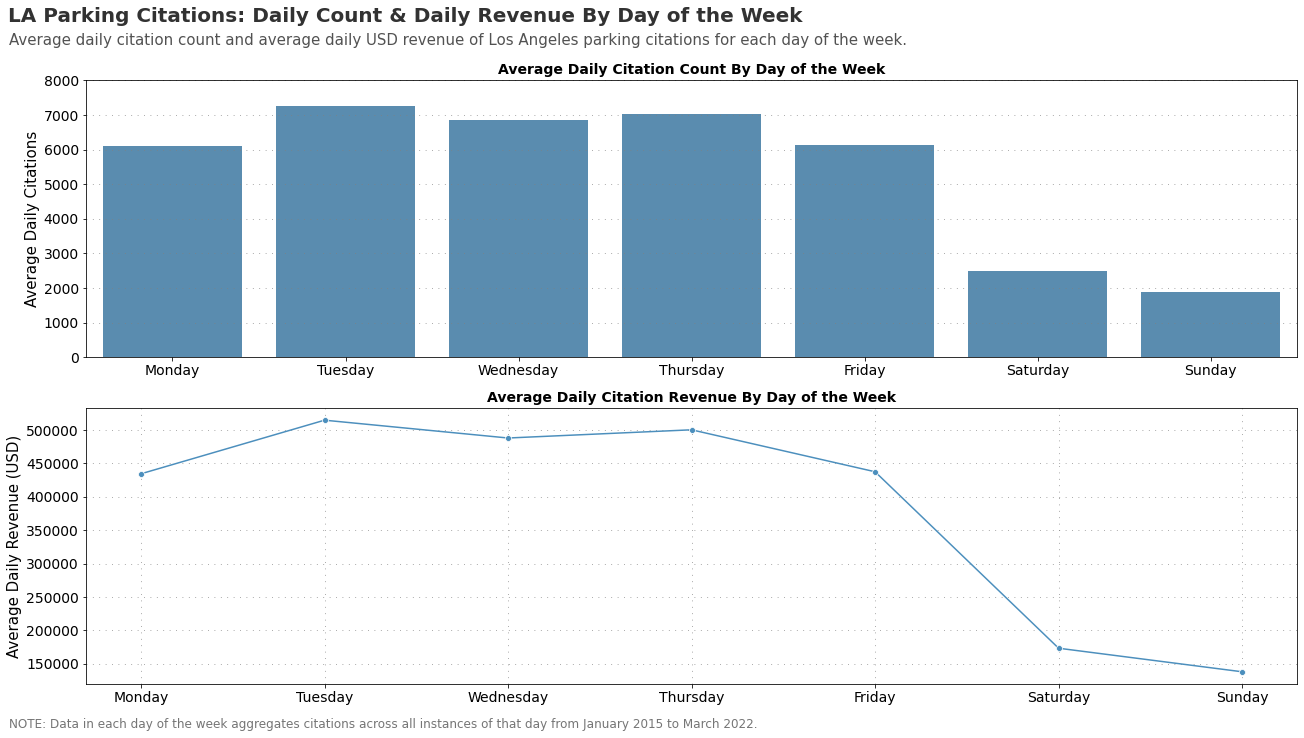

In [19]:
#Plotting unique letters
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Count & Daily Revenue By Day of the Week', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations for each day of the week.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.03, 'NOTE: Data in each day of the week aggregates citations across all instances of that day from January 2015 through March 2022.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count By Day of the Week', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Weekday, x='Weekday', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,8000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue By Day of the Week', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Weekday_sum, x='Weekday', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');


ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Day of Week Daily Revenue.png' , bbox_inches="tight", dpi=300)

## Citations and Revenue By Holidays


In [21]:
#Creating Crosstab and Adjusted Frequency Tables
df_Holiday = pd.crosstab(index=df['Holiday'], columns='count')
df_Holiday = df_Holiday.reset_index() 
df_Holiday_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Holiday']).sum())
df_Holiday_sum = df_Holiday_sum.reset_index() 

In [22]:
#Get Counts of Holidays vs no holiday
us_holidays = holidays.US()
def get_holiday(x):
    return x in us_holidays
All_Days['Holiday'] = All_Days['Dates'].apply(get_holiday)
Holiday_Count = len(All_Days.loc[All_Days['Holiday'] == True])
No_Holiday_Count = len(All_Days.loc[All_Days['Holiday'] == False])
df_Holiday['DayCounts'] = [Holiday_Count,No_Holiday_Count]
df_Holiday['Citations_Per_Day'] = df_Holiday['count']/df_Holiday['DayCounts']
df_Holiday_sum['Revenue_Per_Day'] = df_Holiday_sum['Fine_Amount']/df_Holiday['DayCounts']

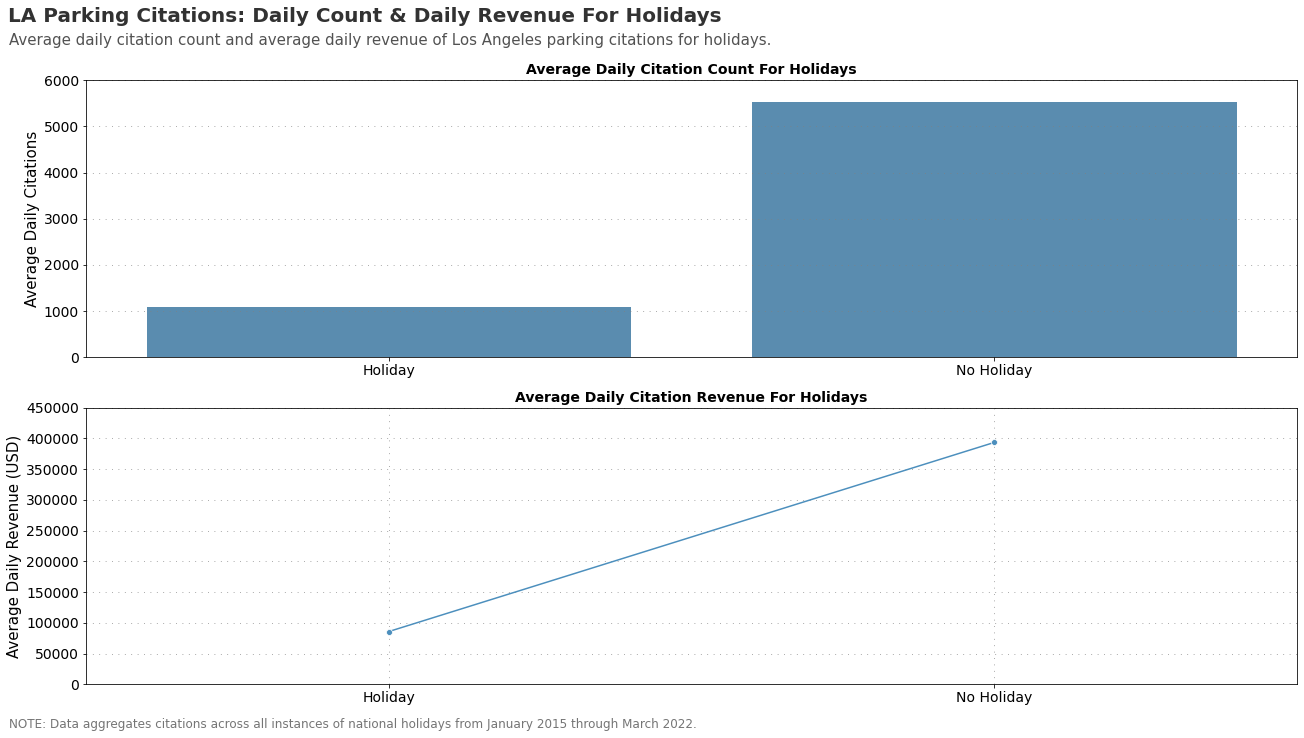

In [68]:
#Plotting unique letters
ax = plt.figure(figsize = (18, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.01, hspace=.01)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Count & Daily Revenue For Holidays', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations for holidays.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.03, 'NOTE: Data aggregates citations across all instances of national holidays from January 2015 through March 2022.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count For Holidays', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Holiday, x='Holiday', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,6000);

#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue For Holidays', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Holiday_sum, x='Holiday', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,450000)
plt.xlim(-0.5,1.5)

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Holidays Daily Revenue.png' , bbox_inches="tight", dpi=300)

## Citations and Revenue By Weekends

In [25]:
#Creating Crosstab and Frequency Tables
df_Weekend = pd.crosstab(index=df['Weekend'], columns='count')
df_Weekend = df_Weekend.reset_index() 
df_Weekend_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Weekend']).sum())
df_Weekend_sum = df_Weekend_sum.reset_index() 

In [26]:
#Get Counts of Days that are weekends
All_Days['Weekday'] = All_Days['Dates'].dt.day_name() 
All_Days['Weekend'] = All_Days['Weekday']
All_Days['Weekend'] = All_Days['Weekend'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'Weekday')
All_Days['Weekend'] = All_Days['Weekend'].replace(['Saturday', 'Sunday'], 'Weekend')

Weekend_Count = len(All_Days.loc[All_Days['Weekend'] == 'Weekend'])
No_Weekend_Count = len(All_Days.loc[All_Days['Weekend'] == 'Weekday'])

df_Weekend['DayCounts'] = [Weekend_Count,No_Weekend_Count]
df_Weekend['Citations_Per_Day'] = df_Weekend['count']/df_Weekend['DayCounts']
df_Weekend_sum['Revenue_Per_Day'] = df_Weekend_sum['Fine_Amount']/df_Weekend['DayCounts']

df_Weekend = df_Weekend.sort_values(by='Citations_Per_Day')
df_Weekend_sum = df_Weekend_sum.sort_values(by='Revenue_Per_Day')

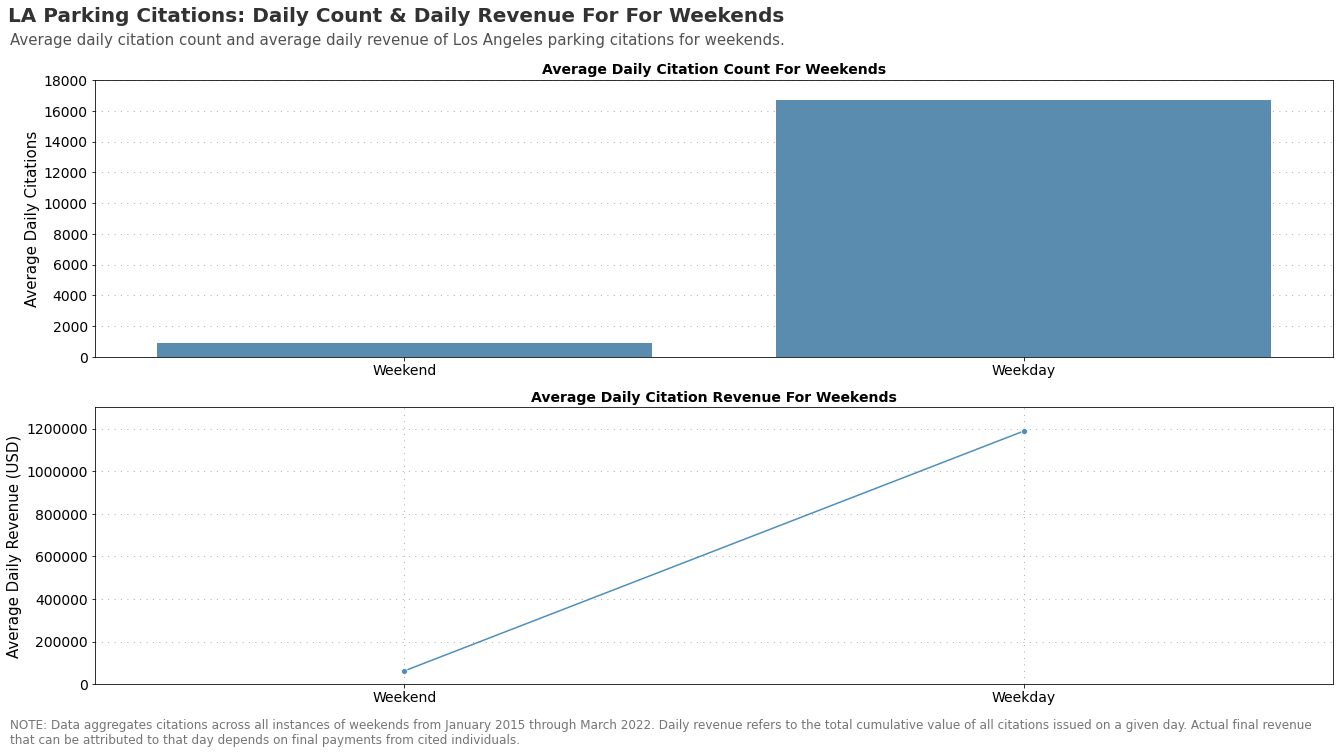

In [72]:
#Plotting unique letters
ax = plt.figure(figsize = (18.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Count & Daily Revenue For For Weekends', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations for weekends.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.055, 'NOTE: Data aggregates citations across all instances of weekends from January 2015 through March 2022. Daily revenue refers to the total cumulative value of all citations issued on a given day. Actual final revenue\nthat can be attributed to that day depends on final payments from cited individuals.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count For Weekends', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Weekend, x='Weekend', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,18000);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue For Weekends', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Weekend_sum, x='Weekend', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
ax2.ticklabel_format(style='plain', axis='y')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,1300000)
plt.xlim(-0.5,1.5)

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Weekends Revenue.png' , bbox_inches="tight", dpi=300)

## Citations and Revenue By Week of the year

In [62]:
#Creating Crosstab and Frequency Tables
df_Week = pd.crosstab(index=df['Week'], columns='count')
df_Week = df_Week.reset_index() 
df_Week_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Week']).sum())
df_Week_sum = df_Week_sum.reset_index() 

In [63]:
#Get Counts of days in weeks of the year
All_Days['Week'] = All_Days['Dates'].dt.isocalendar().week 

df_Week['DayCounts'] = ''
for i in df_Week.index:
  y = df_Week['Week'][i]
  df_Week['DayCounts'][i] = len(All_Days.loc[All_Days['Week'] == y])
df_Week['Citations_Per_Day'] = df_Week['count']/df_Week['DayCounts']
df_Week_sum['Revenue_Per_Day'] = df_Week_sum['Fine_Amount']/df_Week['DayCounts']

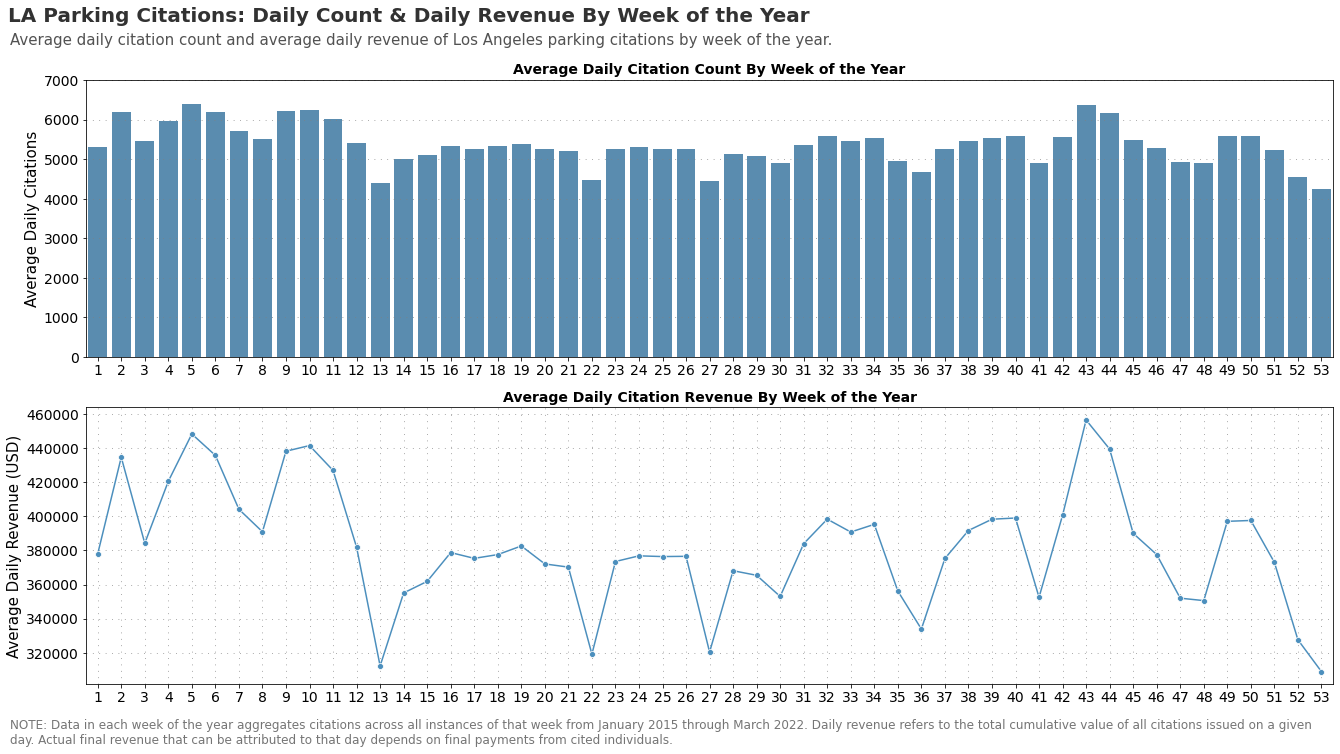

In [79]:
#Plotting unique letters
ax = plt.figure(figsize = (18.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Count & Daily Revenue By Week of the Year', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations by week of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.055, 'NOTE: Data in each week of the year aggregates citations across all instances of that week from January 2015 through March 2022. Daily revenue refers to the total cumulative value of all citations issued on a given\nday. Actual final revenue that can be attributed to that day depends on final payments from cited individuals.', fontsize = 12, color = '#757575')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count By Week of the Year', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Week, x='Week', y='Citations_Per_Day', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,7000);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue By Week of the Year', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Week_sum, x='Week', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(1, 54, step=1))
plt.xlim(0.5,53.5);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Weeks of the Year Daily Revenue.png' , bbox_inches="tight", dpi=300)

## Citations and Revenue By Day of Year

In [73]:
#Creating Crosstab and Frequency Tables
df_Year_Day = pd.crosstab(index=df['Year_Day'], columns='count')
df_Year_Day = df_Year_Day.reset_index()
df_Year_Day_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Year_Day']).sum())
df_Year_Day_sum = df_Year_Day_sum.reset_index() 

In [74]:
#Get Counts of days in days of the year
All_Days['Year_Day'] = All_Days['Dates'].dt.dayofyear

df_Year_Day['DayCounts'] = ''
for i in df_Year_Day.index:
  y = df_Year_Day['Year_Day'][i]
  df_Year_Day['DayCounts'][i] = len(All_Days.loc[All_Days['Year_Day'] == y])
df_Year_Day['Citations_Per_Day'] = df_Year_Day['count']/df_Year_Day['DayCounts']
df_Year_Day_sum['Revenue_Per_Day'] = df_Year_Day_sum['Fine_Amount']/df_Year_Day['DayCounts']

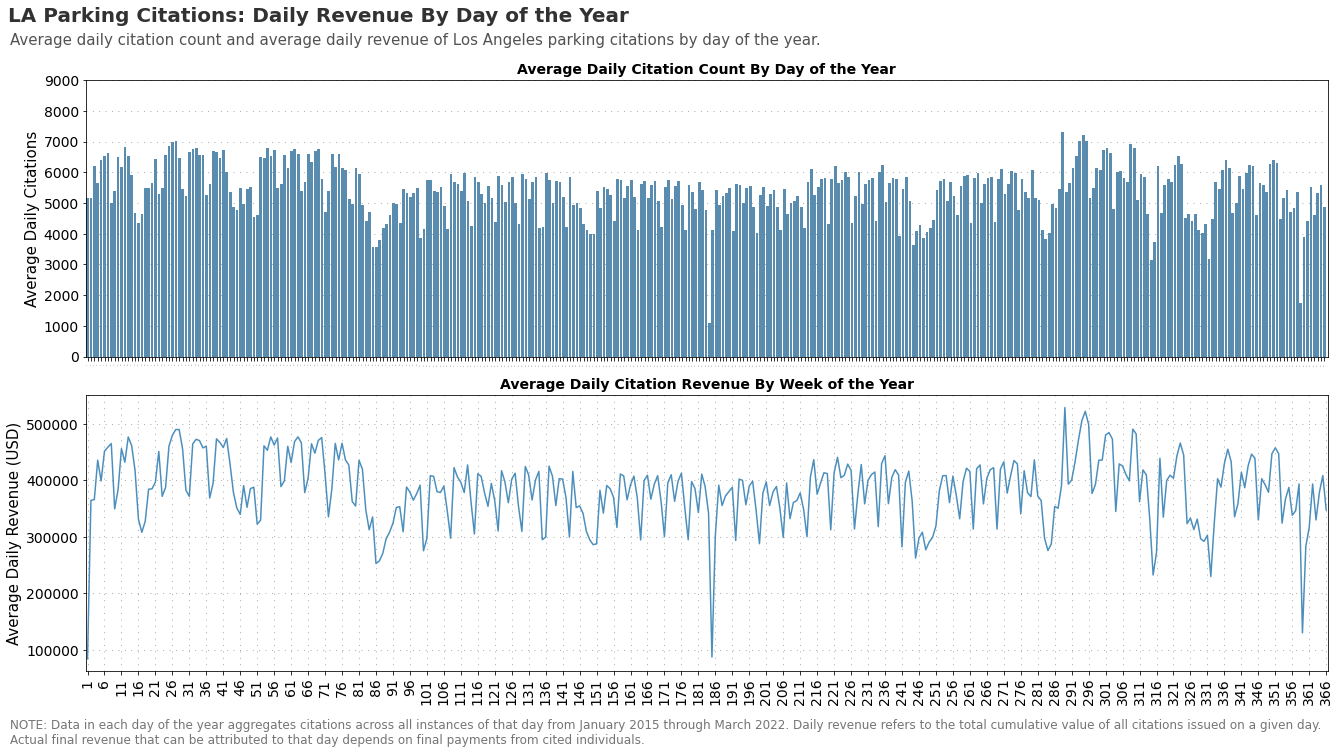

In [80]:
#Plotting unique letters
ax = plt.figure(figsize = (18.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Daily Revenue By Day of the Year', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average daily citation count and average daily revenue of Los Angeles parking citations by day of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

plt.figtext(0.004, -0.055, 'NOTE: Data in each day of the year aggregates citations across all instances of that day from January 2015 through March 2022. Daily revenue refers to the total cumulative value of all citations issued on a given day.\nActual final revenue that can be attributed to that day depends on final payments from cited individuals.', fontsize = 12, color = '#757575')


#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Daily Citation Count By Day of the Year', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Year_Day, x='Year_Day', y='Citations_Per_Day', ax=ax1, color ='#4c8fbd', dodge=True) 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Citations', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=0, fontfamily='sans-serif', rotation=90);
plt.yticks(fontsize=14, fontfamily='sans-serif');
# plt.xticks(np.arange(1, 367, step=5))
plt.xlim(0.5,366);
plt.ylim(0,9000);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Daily Citation Revenue By Week of the Year', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Year_Day_sum, x='Year_Day', y='Revenue_Per_Day', ax=ax2, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Daily Revenue (USD)', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif', rotation=90);
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(1, 367, step=5))
plt.xlim(0.5,366.5);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Days of the Year Daily Revenue.png' , bbox_inches="tight", dpi=300)

## Citations and Revenue By Hour 

In [ ]:
#Creating Crosstab and Frequency Tables
df_Hour = pd.crosstab(index=df['Hour'], columns='count')
df_Hour = df_Hour.reset_index() 
df_Hour_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Hour']).sum())
df_Hour_sum = df_Hour_sum.reset_index() 

In [ ]:
#Get Counts of days in days of the year
df_Hour['HourCounts'] = ''
for i in df_Hour.index:
  y = df_Hour['Hour'][i]
  df_Hour['HourCounts'][i] = len(All_Days)
df_Hour['Citations_Per_Hour'] = df_Hour['count']/df_Hour['HourCounts']
df_Hour_sum['Revenue_Per_Hour'] = df_Hour_sum['Fine_Amount']/df_Hour['HourCounts']

In [ ]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Hours of the Day Frequency & Hourly Revenue', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per hour and average hourly USD revenue of Los Angeles parking citations for weeks of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Hour', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Hour, x='Hour', y='Citations_Per_Hour', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Hour', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,700);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citations Revenue Per Hour', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Hour_sum, x='Hour', y='Revenue_Per_Hour', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Revenue Per Hour', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(0, 24, step=1))
plt.xlim(-0.5,23.5);
plt.xlim(-0.5,23.5);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Hourly Revenue.png' , bbox_inches="tight", dpi=300)

## Citations and Revenue By Minute 

In [ ]:
#Creating Crosstab and Frequency Tables
df_Minute = pd.crosstab(index=df['Minute'], columns='count')
df_Minute = df_Minute.reset_index() 
df_Minute_sum = pd.DataFrame(df['Fine_Amount'].groupby(df['Minute']).sum())
df_Minute_sum = df_Minute_sum.reset_index() 

In [ ]:
#Get Counts of days in days of the year
df_Minute['MinuteCounts'] = ''
for i in df_Minute.index:
  y = df_Minute['Minute'][i]
  df_Minute['MinuteCounts'][i] = len(All_Days) * 24
df_Minute['Citations_Per_Minute'] = df_Minute['count']/df_Minute['MinuteCounts']
df_Minute_sum['Revenue_Per_Minute'] = df_Minute_sum['Fine_Amount']/df_Minute['MinuteCounts']

In [ ]:
#Plotting unique letters
ax = plt.figure(figsize = (17.5, 9), constrained_layout=True)
gs = ax.add_gridspec(2, 1)
gs.update(wspace=0.1, hspace=.07)

#Figure annotations
plt.figtext(0.003, 1.059,'LA Parking Citations: Minutes of the Hour Frequency & Revenue', fontfamily='sans-serif', fontsize=20, fontweight='bold', color='#323232')
plt.figtext(0.004, 1.024, "Average citations per Minute and average citation revenue per minute of Los Angeles parking citations for weeks of the year.", fontfamily='sans-serif',fontsize=15,fontweight='regular',color='#525252')

#Plot 1 specifications
ax1 = ax.add_subplot(gs[0,0])
plt.title('Average Citations Per Minute', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.barplot(data=df_Minute, x='Minute', y='Citations_Per_Minute', ax=ax1, dodge=False, color ='#4c8fbd') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Citations Per Minute', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.ylim(0,6);


#Plot 2 specifications
ax2 = ax.add_subplot(gs[1,0])
plt.title('Average Citation Revenue Per Minute', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.grid(color = 'gray', linestyle = ':', axis = 'x', alpha = 1, zorder = 0,  dashes = (1,7))
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 1, zorder = 0,  dashes = (1,7))
sns.lineplot(data=df_Minute_sum, x='Minute', y='Revenue_Per_Minute', ax=ax2, color ='#4c8fbd', marker='o') 
plt.xlabel('', fontsize = 15, fontfamily='sans-serif')
plt.ylabel('Average Revenue Per Minute', fontsize = 15, fontfamily='sans-serif')
plt.xticks(fontsize=14, fontfamily='sans-serif');
plt.yticks(fontsize=14, fontfamily='sans-serif');
plt.xticks(np.arange(0, 60, step=1))
plt.xlim(-0.5,59.5);

ax.patch.set_facecolor('white')
ax.savefig(f'{directory}/Minute Revenue.png' , bbox_inches="tight", dpi=300)